In [1]:
import pandas as pd
train=pd.read_csv(r"C:\Users\12dem\OneDrive\Desktop\Mtech_assignments\ML\bike_train.csv")


In [2]:
train.dtypes


datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [3]:
train.shape

(10450, 12)

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2012-07-15 7:00:00,3,0,0,1,28.70000,33.335000,79,6.003200,17,30,47
1,2012-08-14 15:00:00,3,0,1,1,33.62000,37.880000,46,15.001300,84,199,283
2,2011-02-06 6:00:00,1,0,0,1,10.66000,12.880000,60,15.001300,0,1,1
3,2012-05-06 17:00:02,2,0,0,2,26.42506,30.566166,61,9.512288,198,330,531
4,2012-01-09 2:00:00,1,0,1,1,9.84000,12.120000,56,8.998100,2,3,5


In [5]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year


In [6]:
#I am type casting the datetime and numerical attributes to category

train['weather']=train.weather.astype('category')
train['season']=train.season.astype('category')
train['workingday']=train.workingday.astype('category')
train['holiday']=train.holiday.astype('category')
train['weekday']=train.weekday.astype('category')  
train['month']=train.month.astype('category')
train['year']=train.year.astype('category')


Dropping datetime cloumn as it is no longer necessary since we have extracted - hour, weekday, month, year from it.

In [7]:
train=train.drop(['datetime'],axis=1)

In [8]:
train.describe()

,temp,atemp,humidity,windspeed,casual,registered,count,hour
count,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000
mean,20.191700,23.605793,61.924211,12.765259,35.869091,154.511675,190.410526,11.515789
std,7.792683,8.478045,19.245193,8.102821,49.629436,150.861267,181.038755,6.939507
min,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.940000,16.665000,47.000000,7.001500,4.000000,35.000000,42.000000,6.000000
50%,20.500000,24.240000,62.000000,12.450050,16.000000,117.000000,143.000000,12.000000
75%,26.240000,31.060000,77.000000,16.997900,49.000000,221.000000,283.000000,18.000000
max,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


In [9]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,month,year
0,3,0,0,1,28.70000,33.335000,79,6.003200,17,30,47,7,6,7,2012
1,3,0,1,1,33.62000,37.880000,46,15.001300,84,199,283,15,1,8,2012
2,1,0,0,1,10.66000,12.880000,60,15.001300,0,1,1,6,6,2,2011
3,2,0,0,2,26.42506,30.566166,61,9.512288,198,330,531,17,6,5,2012
4,1,0,1,1,9.84000,12.120000,56,8.998100,2,3,5,2,0,1,2012


In [10]:
train.isnull().sum()


season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
weekday       0
month         0
year          0
dtype: int64

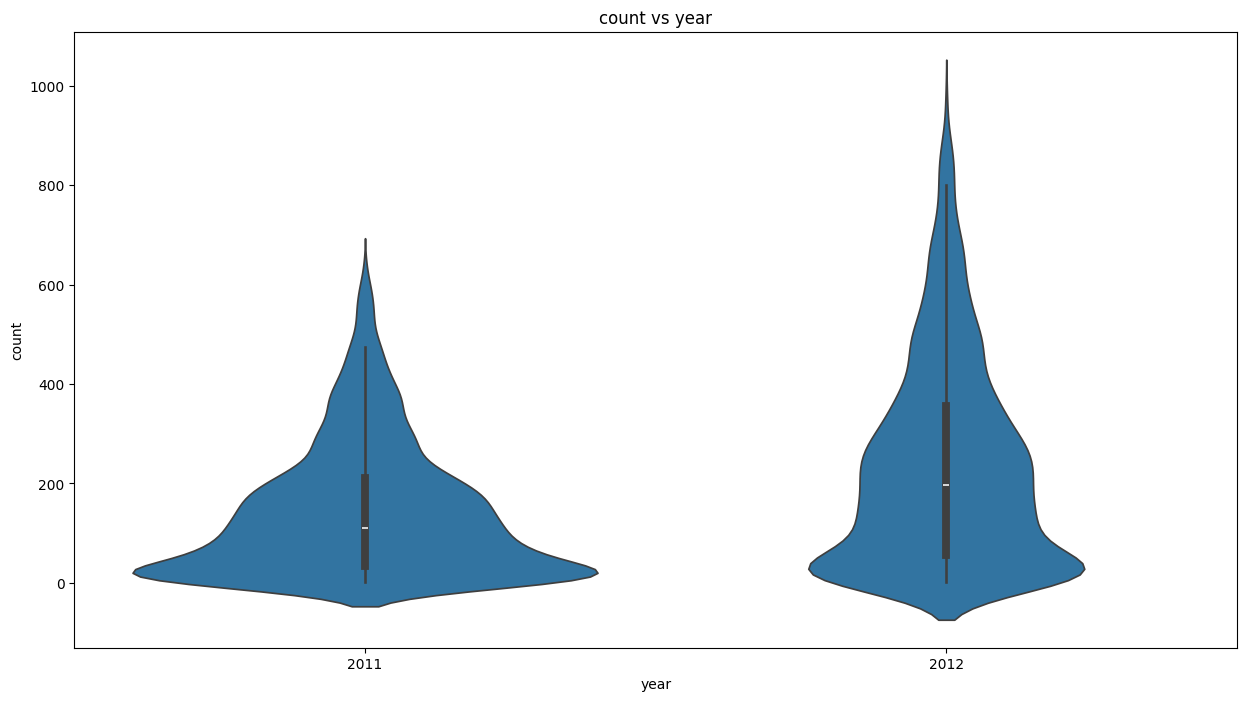

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax=plt.subplots(figsize=(15,8))
sns.violinplot(x='year',y='count',data=train[['year','count']])
ax.set_title('count vs year')
plt.show()

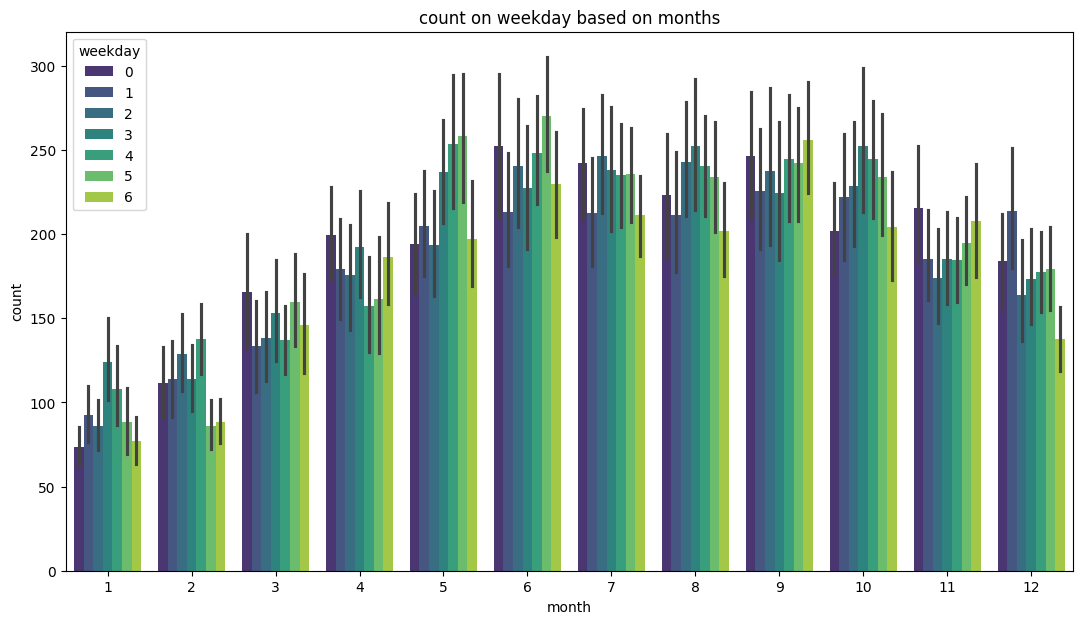

In [12]:
fig,ax1=plt.subplots(figsize=(13,7))
sns.barplot(x='month',y='count',data=train[['weekday','month','count']],hue='weekday',ax=ax1,palette='viridis')
ax1.set_title('count on weekday based on months')
plt.show()

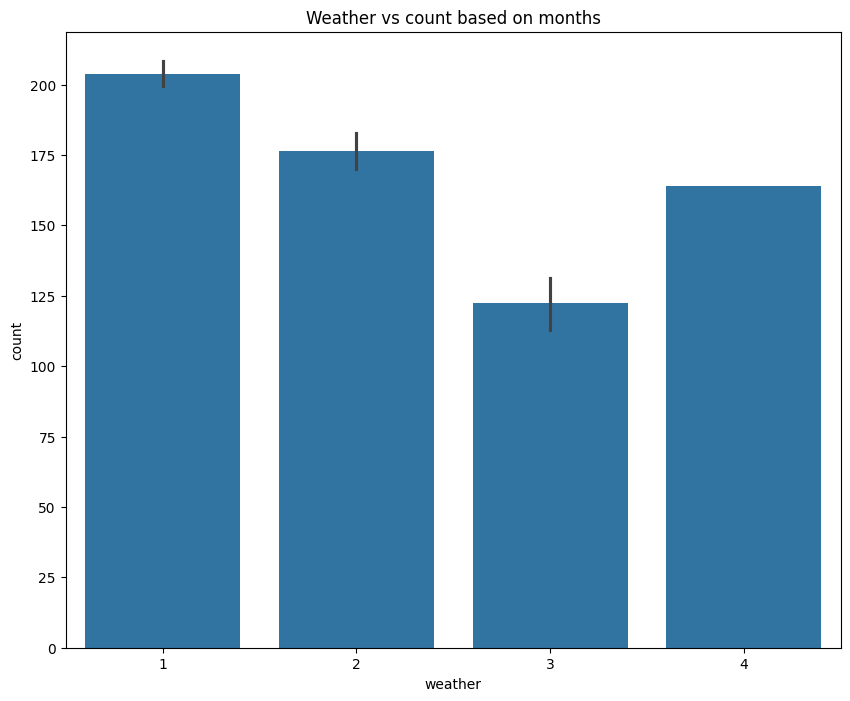

In [13]:
fig,ax1=plt.subplots(figsize=(10,8))
sns.barplot(x='weather',y='count',data=train[['count','month','weather']],ax=ax1)
ax1.set_title('Weather vs count based on months')
plt.show()

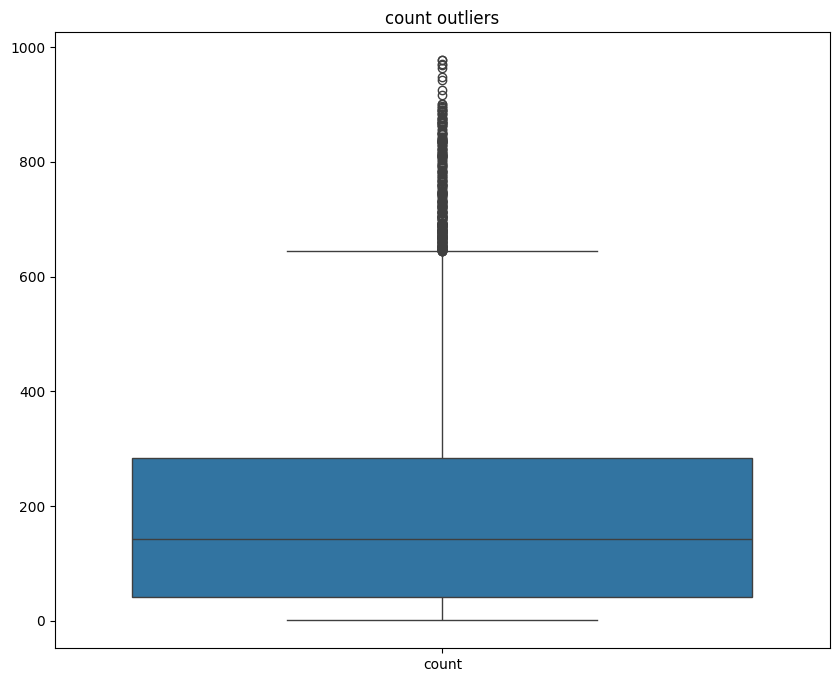

In [14]:
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=train[['count']])
ax.set_title('count outliers')
plt.show()

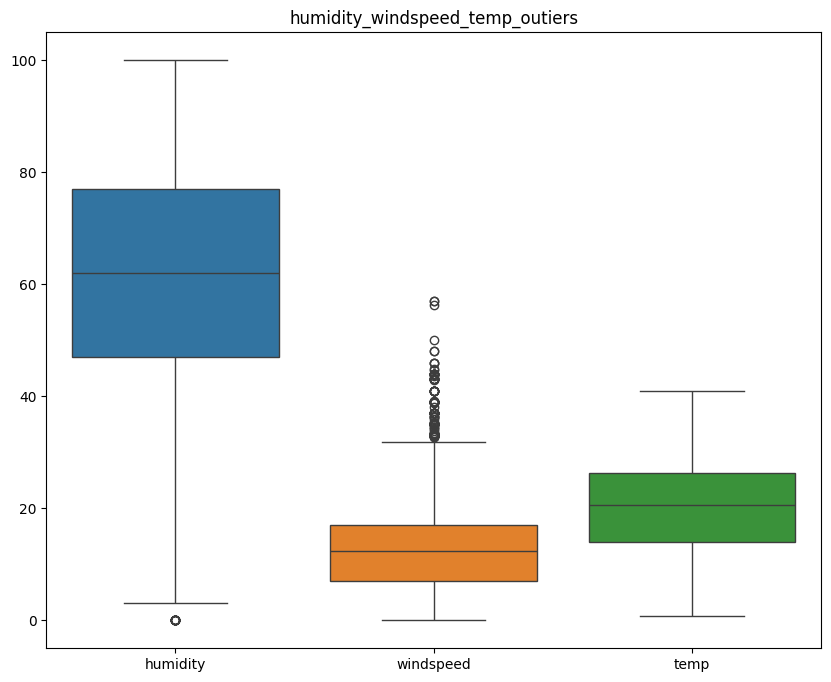

In [15]:
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=train[['humidity','windspeed','temp']])
ax.set_title('humidity_windspeed_temp_outiers')
plt.show()

It seems there are outliers present in both humidity and windspeed feature and no outliers in temp feature.

In [16]:
train.describe()

,temp,atemp,humidity,windspeed,casual,registered,count,hour
count,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000
mean,20.191700,23.605793,61.924211,12.765259,35.869091,154.511675,190.410526,11.515789
std,7.792683,8.478045,19.245193,8.102821,49.629436,150.861267,181.038755,6.939507
min,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.940000,16.665000,47.000000,7.001500,4.000000,35.000000,42.000000,6.000000
50%,20.500000,24.240000,62.000000,12.450050,16.000000,117.000000,143.000000,12.000000
75%,26.240000,31.060000,77.000000,16.997900,49.000000,221.000000,283.000000,18.000000
max,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


In [17]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df



In [18]:
train = remove_outliers_iqr(train, 'humidity')
train = remove_outliers_iqr(train, 'windspeed')


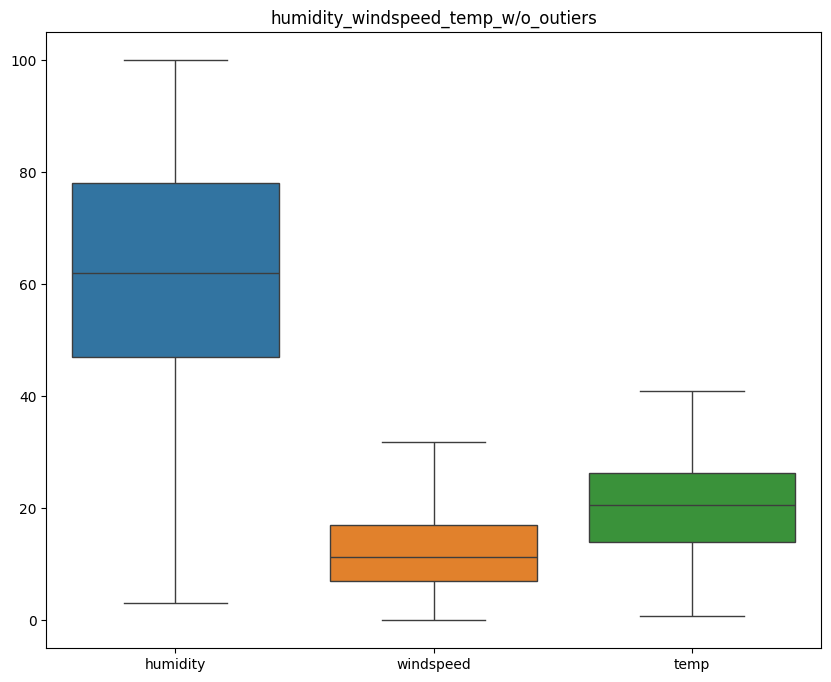

In [19]:
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=train[['humidity','windspeed','temp']])
ax.set_title('humidity_windspeed_temp_w/o_outiers')
plt.show()

<Axes: >

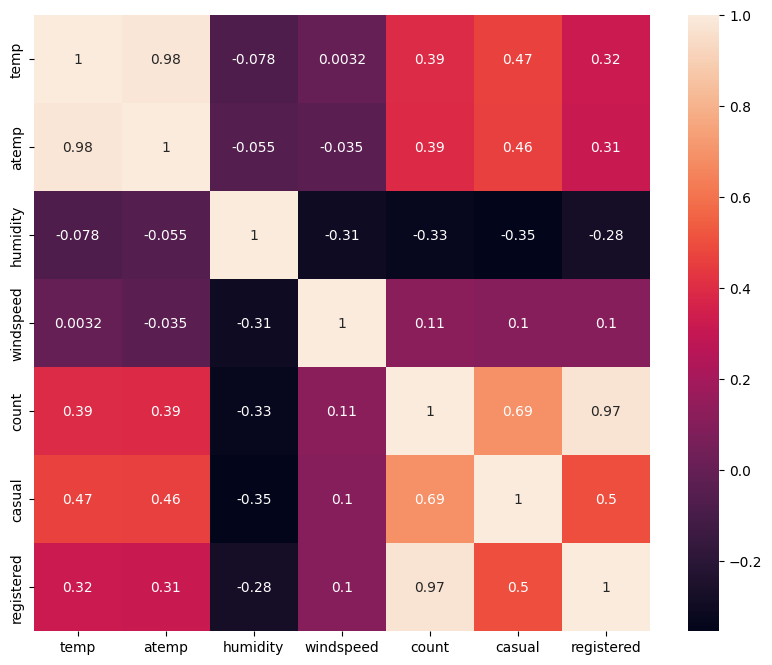

In [20]:
fig,ax=plt.subplots(figsize=(10,8))
coore_mat=train[['temp','atemp','humidity','windspeed','count','casual','registered']].corr()
sns.heatmap(coore_mat, vmax=1, square=True, annot=True,ax=ax)


In [21]:
from sklearn.model_selection import train_test_split
# X_train=train.drop(['count','casual','registered'],axis=1)
# Y_train=train['count']

X_train, X_test, Y_train, Y_test = train_test_split(train.drop(['count','casual','registered'],axis=1),train['count'], test_size=0.25, random_state=42)

Adding reset of indexes as getting error when declaring Y_train

In [22]:
#Reset train index values
X_train.reset_index(drop=True, inplace=True)
Y_train = Y_train.reset_index(drop=True)

# Reset test index values
X_test.reset_index(drop=True, inplace=True)
Y_test = Y_test.reset_index(drop=True)

In [23]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape
print(Y_train.head())
print(Y_test.head())

0     36
1    282
2      1
3      4
4     57
Name: count, dtype: int64
0     96
1    602
2    174
3    364
4    512
Name: count, dtype: int64


Spliting the features into categorical and numerical features

In [24]:
train_features=X_train[['season', 'month','year','holiday', 'workingday', 'weekday','weather', 'temp', 'humidity', 'windspeed']]

test_features=X_test[['season', 'month','year','holiday', 'workingday', 'weekday','weather', 'temp', 'humidity', 'windspeed']]

#categorical features grouped together
categorical_features=['season','year','holiday', 'workingday','weather']

#numerical features grouped together
numerical_features=['month','weekday','temp', 'humidity', 'windspeed']


Encoding the categorical features

In [25]:
traintrain_enc_fts=pd.get_dummies(train_features,columns=categorical_features) #using one hot encoding for categorical features
print(traintrain_enc_fts.shape)


(7678, 19)


In [26]:
X_train=traintrain_enc_fts
Y_train=Y_train.values #used count values to convert to array as it was giving error in model training

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg_model=LinearRegression()
lin_reg_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
lin_reg_model.fit(X_train,Y_train)
lin_reg=lin_reg_model.score(X_train,Y_train)


In [29]:
#Cross validation prediction

from sklearn.model_selection import cross_val_score,cross_val_predict


lr_predict=cross_val_predict(lin_reg_model,X_train,Y_train,cv=5)
lr_predict

array([ 63.4656835 , 361.94527197,  42.11171656, ..., 230.1149933 ,
       203.29725799, 226.86136737], shape=(7678,))

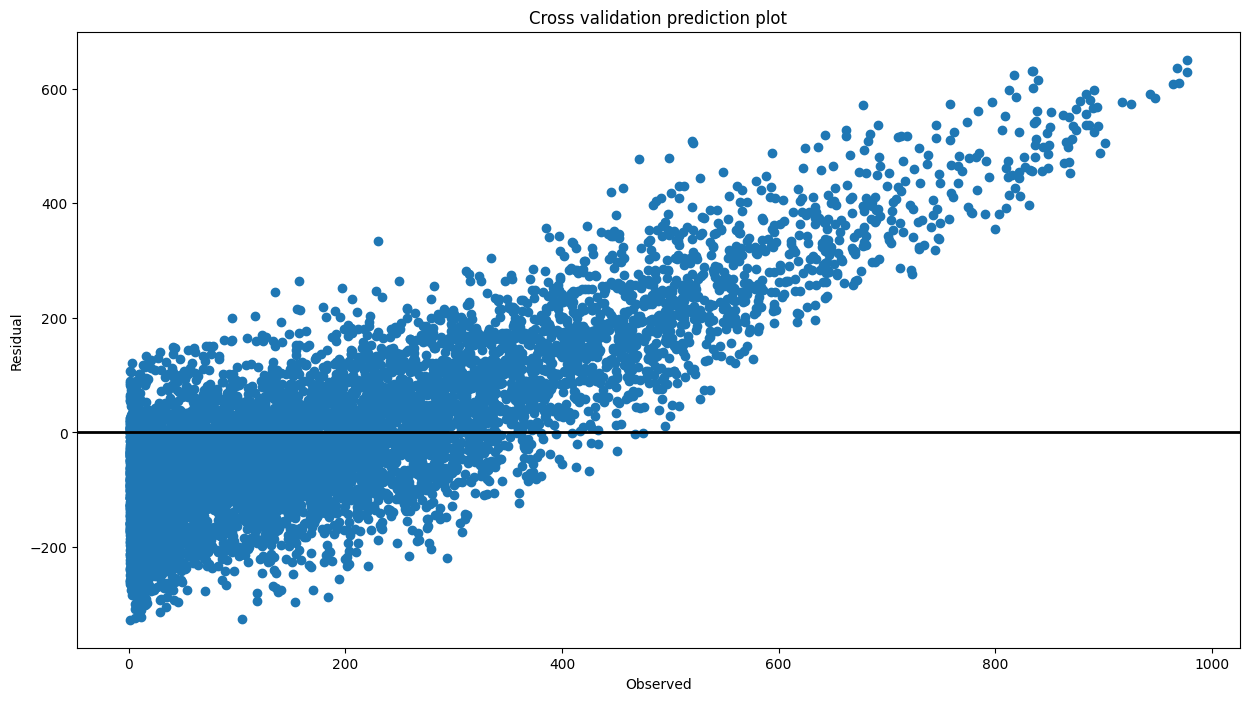

In [30]:
#Cross validation plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(Y_train,Y_train-lr_predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [32]:
test_enc_fts = pd.get_dummies(test_features,columns=categorical_features)
test_enc_fts.shape

(2560, 19)

In [33]:
X_test=test_enc_fts
Y_test=Y_test.values

In [34]:
lr_predict_test=lin_reg_model.predict(X_test)
lr_predict_test

array([200.95313868, 329.03570577, 317.72573924, ...,  45.93710646,
        11.68781862, 236.36351305], shape=(2560,))

In [ ]:
import numpy as np

def rmsle(y_true, y_pred):
    y_pred = np.maximum(0, y_pred)   
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


In [39]:
print("Linear Regression RMSLE:", rmsle(Y_test, lr_predict_test))

Linear Regression RMSLE: 1.449170301495725


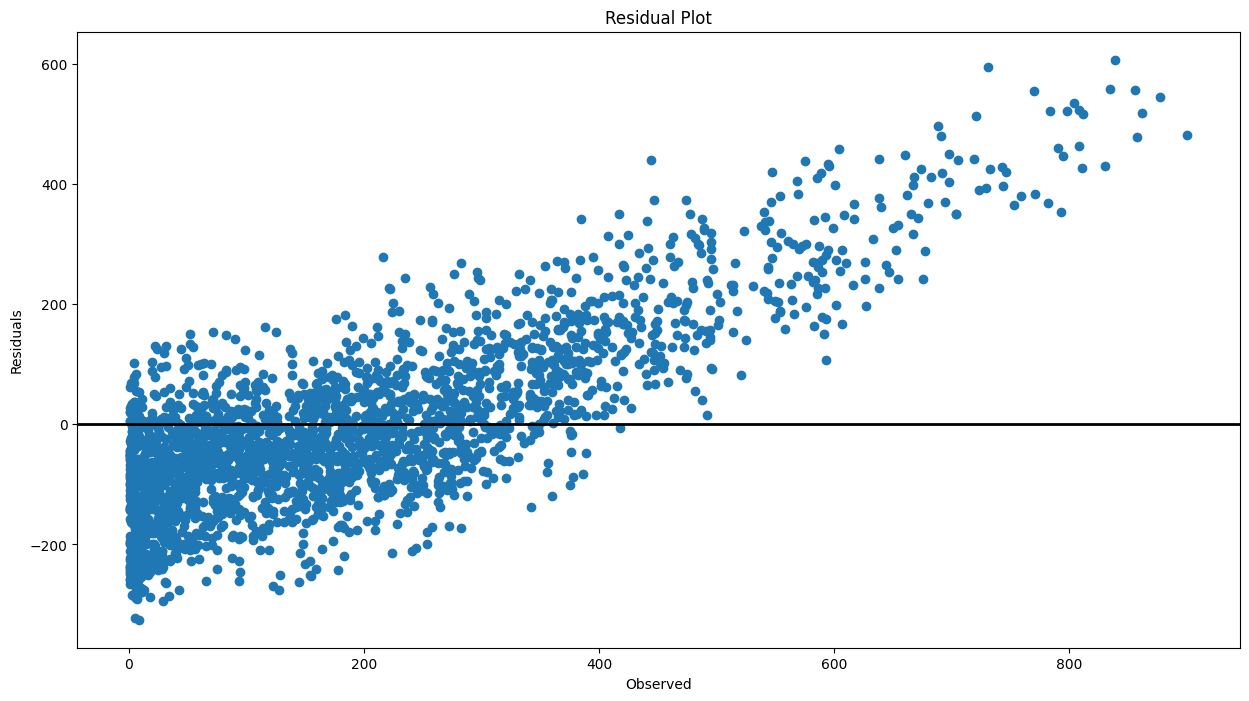

In [36]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(Y_test, Y_test-lr_predict_test)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()